# Salary Prediction Classification | XAI Project

Maxim Lichko<br>
Alexey Demchuk

## 1. Introduction

The task of predicting whether an individual earns more than $50,000 per annum constitutes a significant and socially relevant application of machine learning. The dataset in question encompasses a diverse array of demographic, occupational, and socio-economic variables, making it well-suited for the application of advanced analytical techniques.

Nevertheless, the sensitive nature of this domain—where predictive outcomes intersect with attributes such as race, gender, and education—necessitates not only predictive accuracy but also a high degree of model transparency and interpretability. Consequently, this work places strong emphasis on the use of explainable artificial intelligence (XAI) methods.

Prediction task is to determine whether a person makes over 50K a year.<br>
Kaggle dataset: [link](https://www.kaggle.com/datasets/ayessa/salary-prediction-classification#)

__Columns:__

* __age:__ continuous.
* __workclass:__ Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* __fnlwgt:__ continuous.
* __education:__ Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* __education-num:__ continuous.
* __marital-status:__ Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* __occupation:__ Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* __relationship:__ Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* __race:__ White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* __sex:__ Female, Male.
* __capital-gain:__ continuous.
* __capital-loss:__ continuous.
* __hours-per-week:__ continuous.
* __native-country:__ United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* __salary:__ <=50K or >50K

## 2. EDA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [6]:
df = pd.read_csv('data/salary.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Unique values per column:
age: 73
workclass: 9
fnlwgt: 21648
education: 16
education-num: 16
marital-status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
capital-gain: 119
capital-loss: 92
hours-per-week: 94
native-country: 42
salary: 2


In [9]:
df['salary'].value_counts(normalize=True)

salary
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

In [10]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


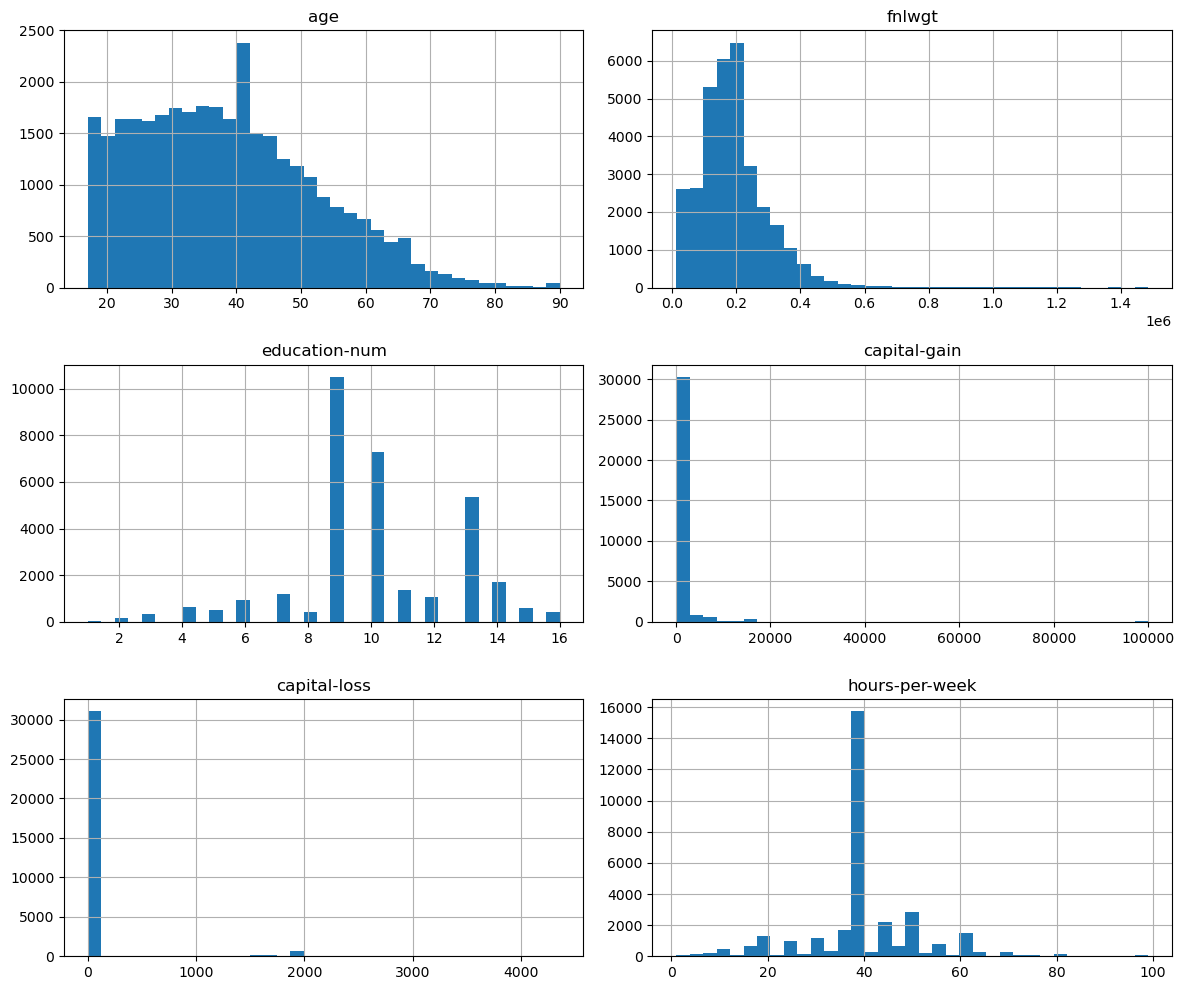

In [11]:
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numerical_features].hist(figsize=(12, 10), bins=35)
plt.tight_layout()
plt.show()

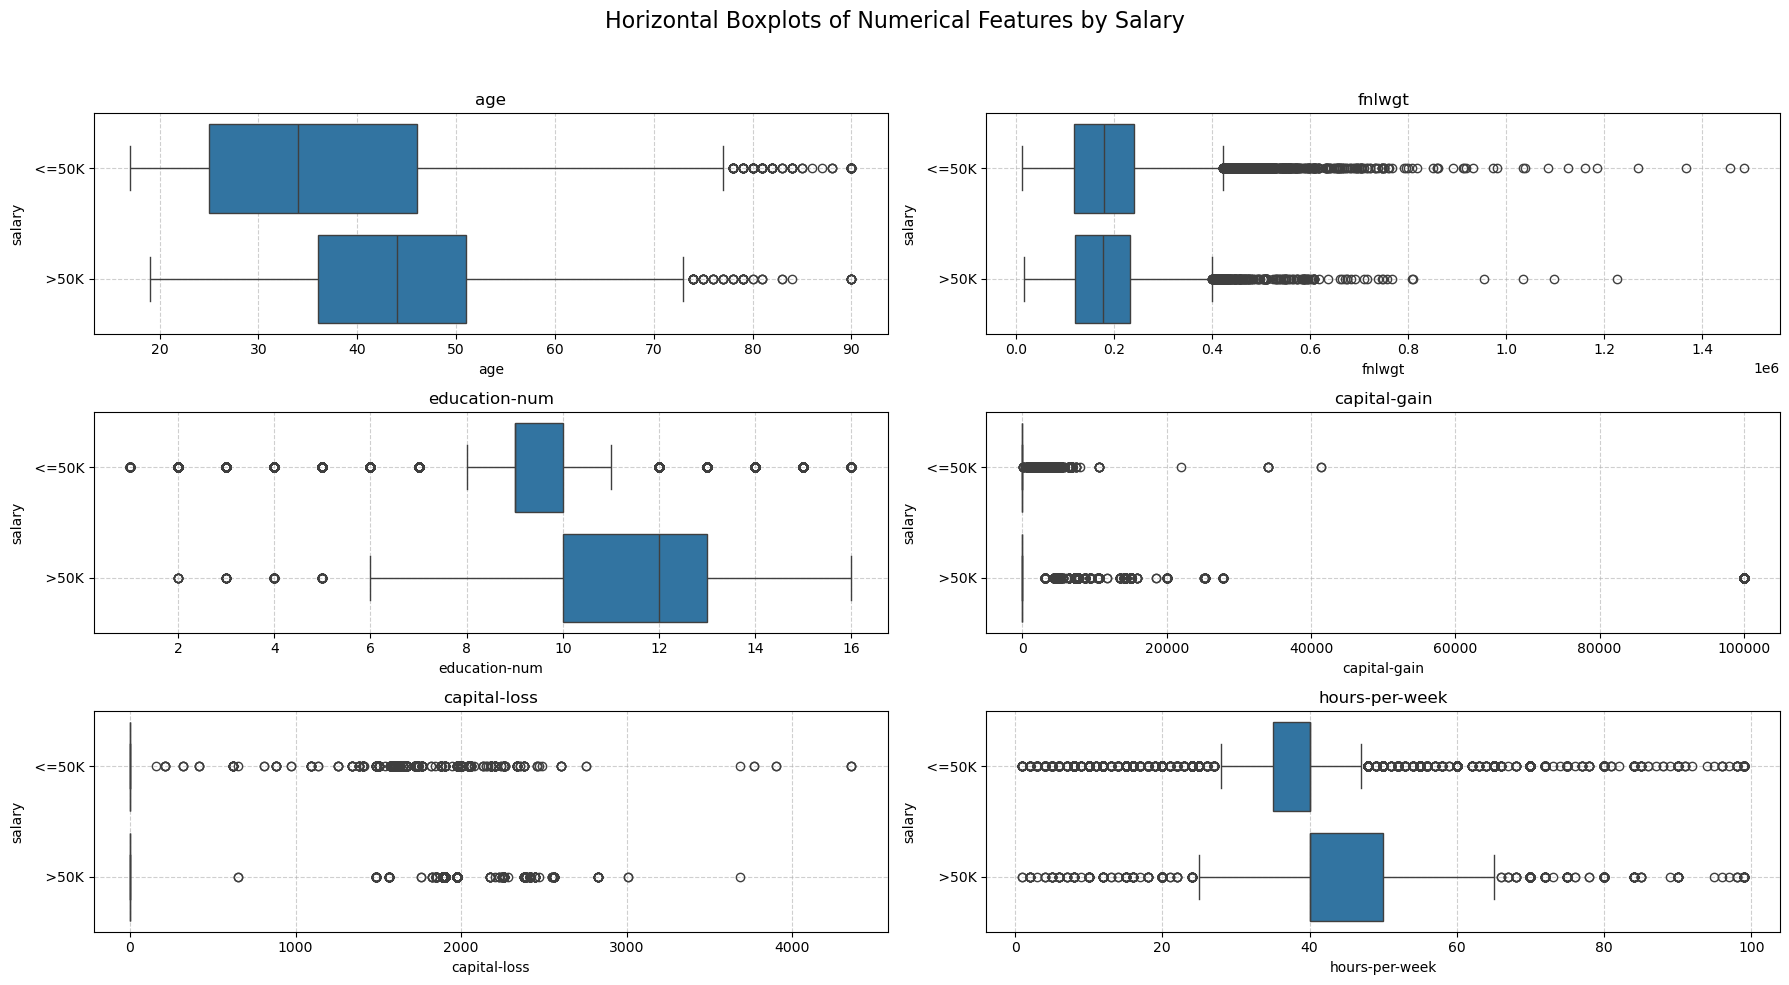

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
fig.suptitle('Horizontal Boxplots of Numerical Features by Salary', fontsize=16)

for ax, feature in zip(axes.flatten(), numerical_features):
    sns.boxplot(data=df, x=feature, y='salary', ax=ax, orient='h')
    ax.set_title(f'{feature}')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

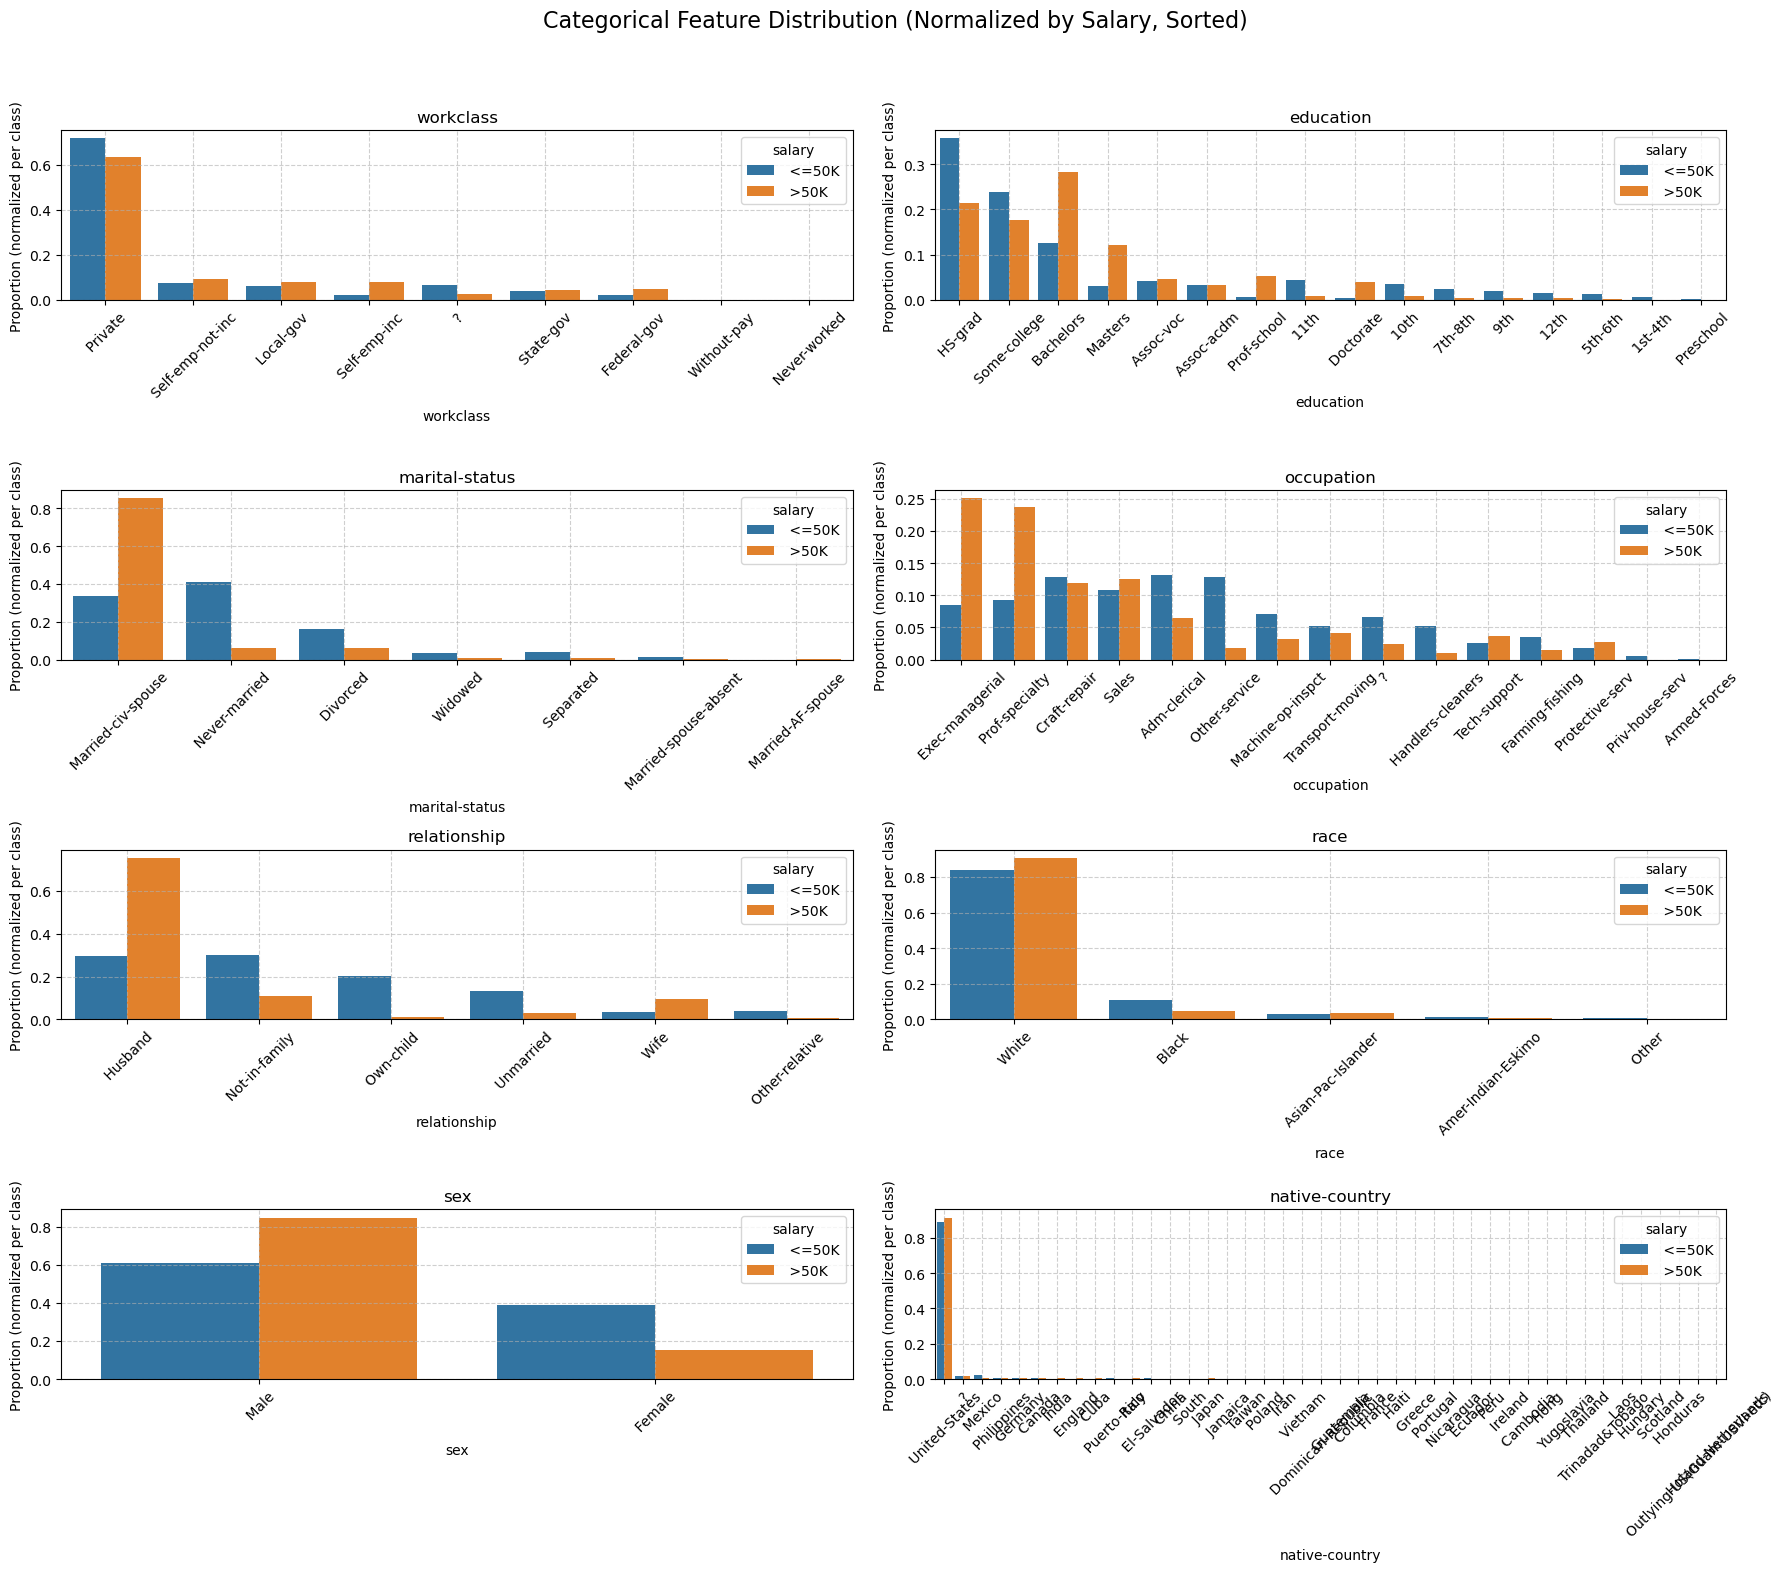

In [13]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country']

n = len(categorical_features)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, rows * 4))
fig.suptitle('Categorical Feature Distribution (Normalized by Salary, Sorted)', fontsize=16)

for ax, feature in zip(axes.flatten(), categorical_features):
    prop_df = (
        df.groupby(['salary', feature])
        .size()
        .groupby(level=0)
        .transform(lambda x: x / x.sum())
        .rename('proportion')
        .reset_index()
    )
    
    pivot_df = prop_df.pivot(index=feature, columns='salary', values='proportion').fillna(0)
    
    if '>50K' in pivot_df.columns:
        sorted_categories = pivot_df['>50K'].sort_values(ascending=False).index
    else:
        sorted_categories = pivot_df.sum(axis=1).sort_values(ascending=False).index

    sns.barplot(data=prop_df, x=feature, y='proportion', hue='salary',
                order=sorted_categories, ax=ax)

    ax.set_title(f'{feature}')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_ylabel('Proportion (normalized per class)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

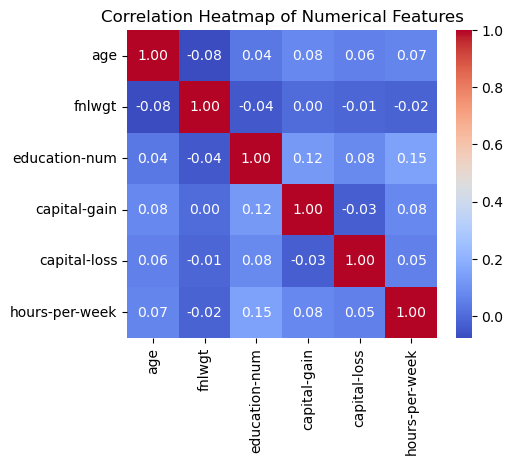

In [14]:
plt.figure(figsize=(5, 4))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## 3. Feature Engineering

In [16]:
df_fe = df.copy()
print("Missing values:\n", df_fe.isnull().sum())
df_fe.head()

Missing values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
del df_fe['education-num']

df_fe = df_fe.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df_fe['sex'] = df_fe['sex'].map({'Male': 1, 'Female': 0})
df_fe['salary'] = df_fe['salary'].map({'>50K': 1, '<=50K': 0})
df_fe['capital_diff'] = df_fe['capital-gain'] - df_fe['capital-loss']

In [18]:
df_fe['native-country'] = df_fe['native-country'].str.strip()

def map_country_to_region(country):
    latin_america = {
        'Mexico', 'Puerto-Rico', 'Honduras', 'Cuba', 'Jamaica', 'Columbia',
        'Dominican-Republic', 'El-Salvador', 'Guatemala', 'Haiti', 'Nicaragua',
        'Peru', 'Ecuador', 'Trinadad&Tobago'
    }
    asia = {
        'India', 'China', 'Japan', 'Philippines', 'Iran', 'Cambodia', 'Thailand',
        'Laos', 'Vietnam', 'Taiwan', 'Hong'
    }
    europe = {
        'England', 'Germany', 'Italy', 'Poland', 'Portugal', 'France', 'Ireland',
        'Greece', 'Scotland', 'Yugoslavia', 'Hungary', 'Holand-Netherlands'
    }
    north_america = {
        'United-States', 'Canada'
    }

    if country in latin_america:
        return 'Latin_America'
    elif country in asia:
        return 'Asia'
    elif country in europe:
        return 'Europe'
    elif country in north_america:
        return 'North_America'
    else:
        return 'Other'

df_fe['native_region'] = df_fe['native-country'].apply(map_country_to_region)
print(df_fe[['native_region', 'native-country']].drop_duplicates().sort_values('native_region'))

del df_fe['native-country']

       native_region              native-country
304             Asia                        Laos
311             Asia                      Taiwan
152             Asia                 Philippines
135             Asia                        Iran
873             Asia                       China
265             Asia                    Thailand
1020            Asia                       Japan
2259            Asia                     Vietnam
11              Asia                       India
2655            Asia                        Hong
255             Asia                    Cambodia
1025          Europe                  Yugoslavia
1888          Europe                      Greece
503           Europe                      France
359           Europe                    Portugal
2966          Europe                     Ireland
8562          Europe                     Hungary
1586          Europe                    Scotland
19609         Europe          Holand-Netherlands
217           Europe

In [19]:
df_fe['education'] = df_fe['education'].str.strip()

def map_education_level(edu):
    if edu == 'Preschool':
        return 'Preschool'
    elif edu in ['1st-4th', '5th-6th']:
        return 'Primary_school'
    elif edu in ['7th-8th']:
        return 'Middle_school'
    elif edu in ['9th', '10th', '11th', '12th']:
        return 'Some_high_school'
    elif edu == 'HS-grad':
        return 'High_school_graduate'
    elif edu in ['Some-college', 'Assoc-acdm', 'Assoc-voc']:
        return 'Some_college_or_associate'
    elif edu == 'Bachelors':
        return "Bachelor_degree"
    elif edu in ['Masters', 'Doctorate', 'Prof-school']:
        return 'Advanced_degree'
    else:
        return 'Other'

df_fe['education_group'] = df_fe['education'].apply(map_education_level)
print(df_fe[['education', 'education_group']].drop_duplicates().sort_values('education'))

del df_fe['education']

        education            education_group
77           10th           Some_high_school
3            11th           Some_high_school
415          12th           Some_high_school
160       1st-4th             Primary_school
56        5th-6th             Primary_school
15        7th-8th              Middle_school
6             9th           Some_high_school
13     Assoc-acdm  Some_college_or_associate
14      Assoc-voc  Some_college_or_associate
0       Bachelors            Bachelor_degree
20      Doctorate            Advanced_degree
2         HS-grad       High_school_graduate
5         Masters            Advanced_degree
224     Preschool                  Preschool
52    Prof-school            Advanced_degree
10   Some-college  Some_college_or_associate


In [20]:
df_fe['relationship'] = df_fe['relationship'].str.strip()

unify_map = {
    'Husband': 'Spouse',
    'Wife': 'Spouse',
    'Unmarried': 'Non-family',
    'Not-in-family': 'Non-family'
}

df_fe['relationship'] = df_fe['relationship'].replace(unify_map)
print(df_fe[['marital-status', 'relationship']].drop_duplicates().sort_values('marital-status'))

              marital-status    relationship
2                   Divorced      Non-family
233                 Divorced  Other-relative
32                  Divorced       Own-child
13034      Married-AF-spouse  Other-relative
11481      Married-AF-spouse       Own-child
37         Married-AF-spouse          Spouse
1172      Married-civ-spouse      Non-family
74        Married-civ-spouse  Other-relative
1         Married-civ-spouse          Spouse
33        Married-civ-spouse       Own-child
6      Married-spouse-absent      Non-family
485    Married-spouse-absent       Own-child
766    Married-spouse-absent  Other-relative
12             Never-married       Own-child
110            Never-married  Other-relative
0              Never-married      Non-family
21                 Separated      Non-family
71                 Separated       Own-child
159                Separated  Other-relative
147                  Widowed      Non-family
1223                 Widowed       Own-child
1710      

In [21]:
one_hot_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native_region', 'education_group']
df_fe = pd.get_dummies(df_fe, columns=one_hot_cols, drop_first=True).astype(int)

df_fe['age_bin'] = pd.cut(df_fe['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elder'])
df_fe['work_hours_bin'] = pd.cut(df_fe['hours-per-week'], bins=[0, 20, 40, 60, 100], labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])

df_fe = pd.get_dummies(df_fe, columns=['age_bin', 'work_hours_bin'], drop_first=True).astype(int)

In [22]:
df_fe.head()

,age,fnlwgt,sex,capital-gain,capital-loss,hours-per-week,salary,capital_diff,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Other-relative,relationship_Own-child,relationship_Spouse,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native_region_Europe,native_region_Latin_America,native_region_North_America,native_region_Other,education_group_Bachelor_degree,education_group_High_school_graduate,education_group_Middle_school,education_group_Preschool,education_group_Primary_school,education_group_Some_college_or_associate,education_group_Some_high_school,age_bin_Middle-aged,age_bin_Senior,age_bin_Elder,work_hours_bin_Full-time,work_hours_bin_Overtime,work_hours_bin_Extreme
0,39,77516,1,2174,0,40,0,2174,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,50,83311,1,0,0,13,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,38,215646,1,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,53,234721,1,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
4,28,338409,0,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [23]:
df_fe.shape

(32561, 60)

## 4. Models

In [46]:
# column fnlwgt ???
# lover number of columns ???
# pay attention to age_bin and work_hours_bin